# Census Income Project

In [1]:
# importing all the requried libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_columns',None) 

!pip install imblearn
!pip install xgboost

# Examining the Data

In [2]:
#reading csv file
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')

In [3]:
#checking head
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


* different areas of a person are included which are required for a person to earn
* based on those requirements the person income depends
* using those featurea we have to predict the label income
* some have more than 50k and some have less than 50k 
* binary classification problem.

In [4]:
#checking dataset shape.
df.shape

(32560, 15)

* Dataset contains 32560 rows and 15 colums.

In [5]:
#checking information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


* Dataset contains intiger(6), object(9) type.

In [6]:
#checking null value.
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

* There are no null values in the dataset.

In [7]:
# describing dataset
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


1. The mean is more than 50% in all the columns.
2. There is a large difference in 75%.
3. The 1 and 2 observation suggest that there are    extreme outliers present in these columns.

In [8]:
#checking count of the label
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

* There is a huge difference in the distribution in this column is unbalanced

In [9]:
#checking categorical column
cat_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_col.append(i)
cat_col

['Workclass',
 'Education',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country',
 'Income']

In [10]:
#checking numerical columns
num_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        num_col.append(i)
num_col

['Age',
 'Fnlwgt',
 'Education_num',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week']

In [11]:
#checking columns
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [12]:
#checking value counts in all the columns
df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [13]:
df['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

In [14]:
df['Marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

In [15]:
df['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [16]:
df['Relationship'].value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

In [17]:
df['Race'].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

In [18]:
df['Sex'].value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

In [19]:
df['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [20]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

# Data Preprocessing

We have to find missing values with '?' so that we need to replace with the mode of the classes.

In [21]:
df['Workclass']=df['Workclass'].replace({'?':'Private'})
df['Occupation']=df['Occupation'].replace({'?':'prof-specialty'})
df['Native_country']=df['Native_country'].replace({'?':'United-States'})

# Feature Engineering 

In [22]:
df.Education=df.Education.replace(['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th'],'Primary-school')
df.Education=df.Education.replace(['HS-grad','Prof-school'],'Higher-school')
df.Education=df.Education.replace(['Some-college','Assoc-voc','Assoc-acdm'],'secondary-school')
df.Education=df.Education.replace(['bachelors'],'Granduation')
df.Education=df.Education.replace(['Masters'],'Masters')
df.Education=df.Education.replace(['Doctorate'],'Post_graduation')

In [23]:
df.Marital_status=df.Marital_status.replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'],'Married')
df.Marital_status=df.Marital_status.replace(['Never-married'],'Single')
df.Marital_status=df.Marital_status.replace(['Dicorced','Widowed','Separated'],'Others')

In [24]:
df.head(30)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [25]:
#cheking unique values in the dataset
df.apply(lambda x: len(x.unique()))

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

# Data Visualisation

In [26]:
#ploting the count plot 

<AxesSubplot:xlabel='Workclass', ylabel='count'>

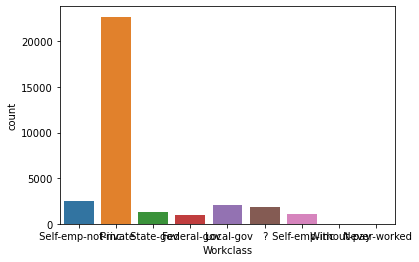

In [27]:
sns.countplot(df['Workclass'])

<AxesSubplot:xlabel='Education', ylabel='count'>

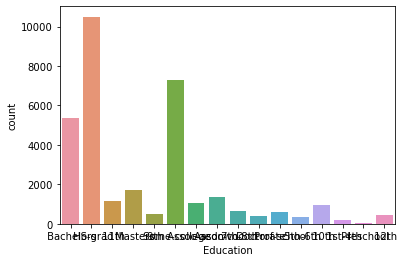

In [28]:
sns.countplot(df['Education'])

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

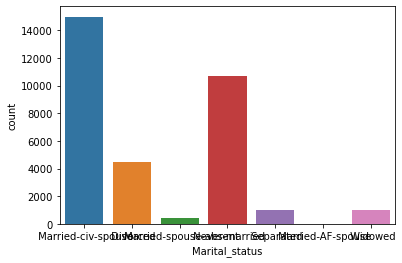

In [29]:
sns.countplot(df['Marital_status'])

<AxesSubplot:xlabel='Occupation', ylabel='count'>

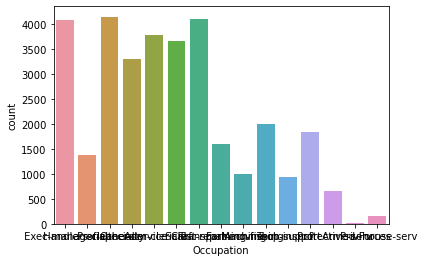

In [30]:
sns.countplot(df['Occupation'])

<AxesSubplot:xlabel='Relationship', ylabel='count'>

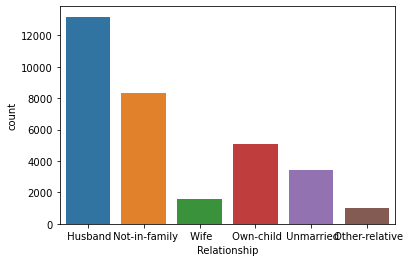

In [31]:
sns.countplot(df['Relationship'])

<AxesSubplot:xlabel='Race', ylabel='count'>

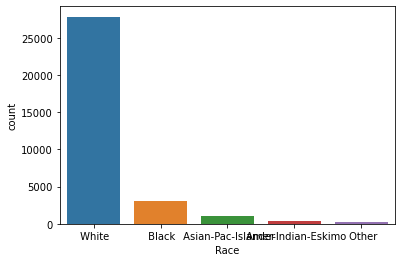

In [32]:
sns.countplot(df['Race'])

<AxesSubplot:xlabel='Sex', ylabel='count'>

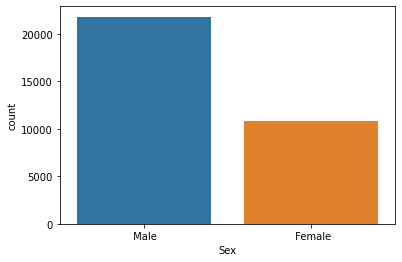

In [33]:
sns.countplot(df['Sex'])

<AxesSubplot:xlabel='Native_country', ylabel='count'>

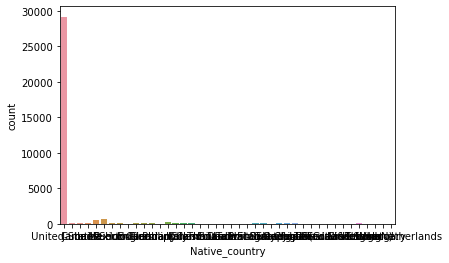

In [34]:
sns.countplot(df['Native_country'])

<AxesSubplot:xlabel='Income', ylabel='count'>

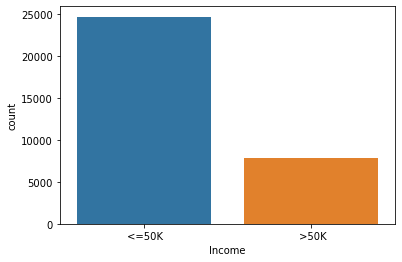

In [35]:
sns.countplot(df['Income'])

In [36]:
#Replacing the classes with 0 and 1
df['Income']=df['Income'].replace({' <=50K': 0,' >50K': 1})

In [37]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


## Correlation

In [38]:
df.corr()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234039
Fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770,-0.009481
Education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127,0.335182
Capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409,0.223333
Capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256,0.150523
Hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000,0.229690
Income,0.234039,-0.009481,0.335182,0.223333,0.150523,0.229690,1.000000


* There is no such correlation between one feature to another.

## Heat Map

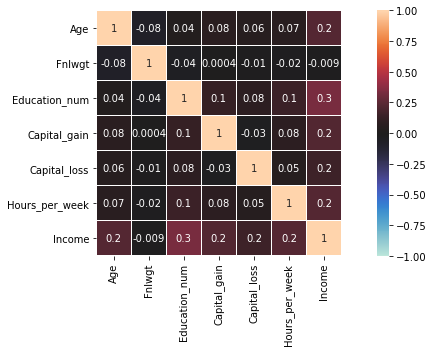

In [39]:
#ploting heatmap 
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),vmin=-1,annot=True,square=True,center=0,fmt='.1g',linewidth=0.2)
plt.tight_layout()

* There is no such corelation between one feature to another.
* Label is also not correlated with the other features

## Distribution Plot

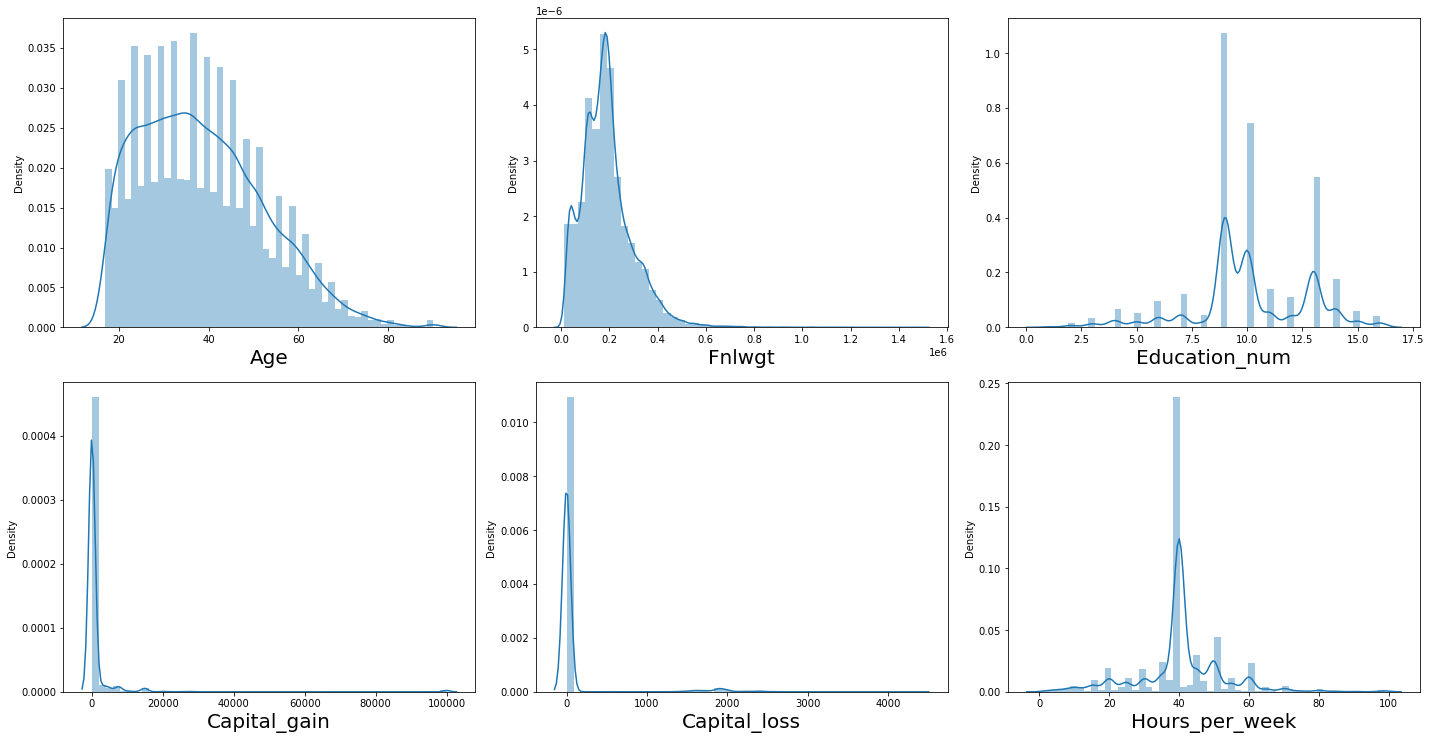

In [40]:
#ploting all distribution
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=15:
        ax=plt.subplot(5,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

* The data is not normal 
* There is so much of skewness present
* Have to remove skewness.

## Log Transformation

In [41]:
df['Age']=np.log(1+df['Age'])
df['Fnlwgt']=np.log(1+df['Fnlwgt'])
df['Education_num']=np.log(1+df['Education_num'])
df['Capital_gain']=np.log(1+df['Capital_gain'])
df['Capital_loss']=np.log(1+df['Capital_loss'])
df['Hours_per_week']=np.log(1+df['Hours_per_week'])

## Box plot

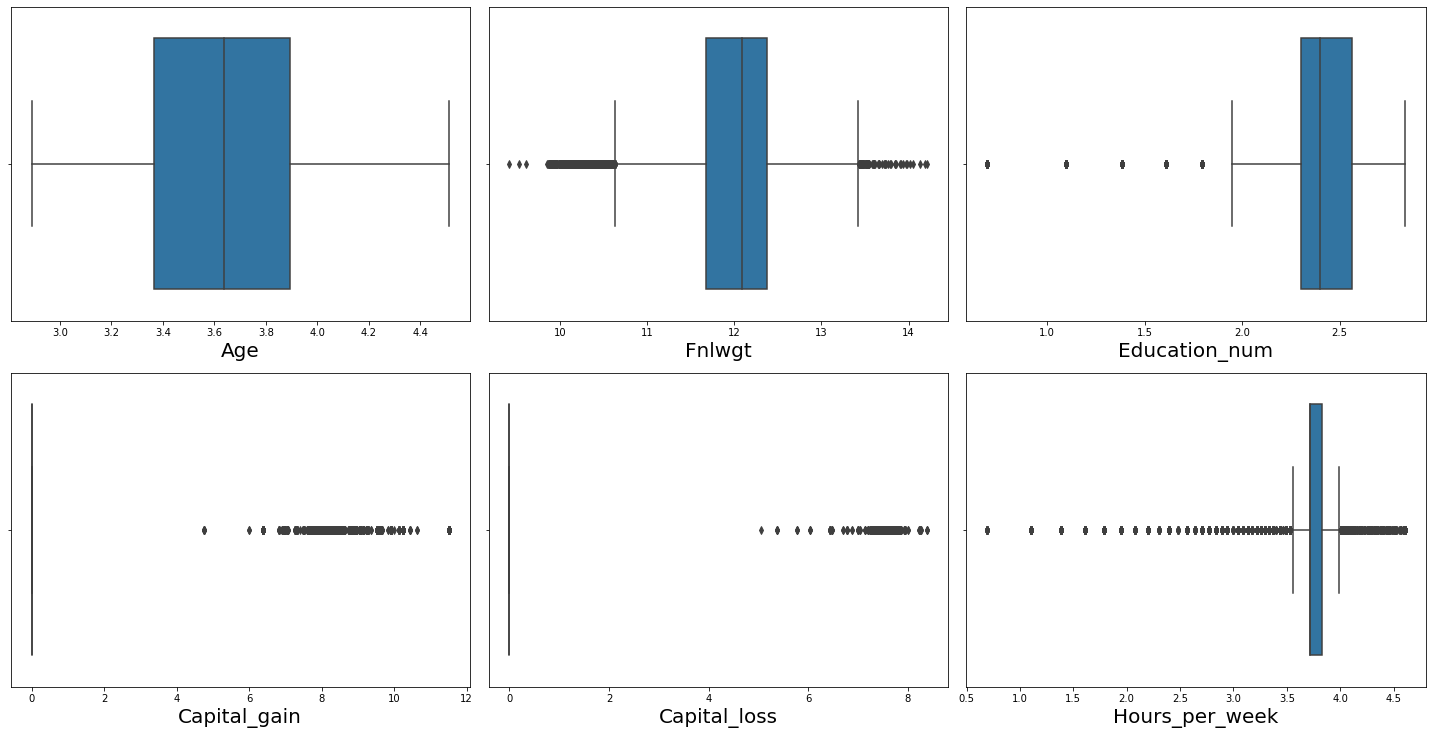

In [42]:
#Plotting the box plot to check the outliers
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=15:
        ax=plt.subplot(5,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

* Data seems to be good and some of the outlier still exist


## Appying Z Score 

In [43]:
#importing scipy
from scipy import stats

In [44]:
#Removing outliers
z=np.abs(stats.zscore(df[num_col]))
print(z)

[[0.8955433  1.03603342 0.97351073 0.29921644 0.22107807 2.65185967]
 [0.12914255 0.47183429 0.25533282 0.29921644 0.22107807 0.12456146]
 [1.05883861 0.60621773 1.07028421 0.29921644 0.22107807 0.12456146]
 ...
 [1.31182594 0.08363419 0.25533282 0.29921644 0.22107807 0.12456146]
 [1.37948811 0.36418346 0.25533282 0.29921644 0.22107807 1.60418498]
 [1.00543724 0.93014422 0.25533282 3.61918788 0.22107807 0.12456146]]


In [45]:
print('Row Numbers:',np.where(z>3)[0])

Row Numbers: [    7     8    22 ... 32538 32552 32559]


In [46]:
#droping outliers columns
index=(np.where(z>3)[0])
df.drop(df.index[index])

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,3.931826,Self-emp-not-inc,11.330348,Bachelors,2.639057,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,2.639057,United-States,0
1,3.663562,Private,12.281398,HS-grad,2.302585,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,3.713572,United-States,0
2,3.988984,Private,12.366157,11th,2.079442,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,3.713572,United-States,0
3,3.367296,Private,12.732013,Bachelors,2.639057,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,3.713572,Cuba,0
4,3.637586,Private,12.558780,Masters,2.708050,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,3.713572,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,3.135494,Private,12.644821,Some-college,2.397895,Never-married,Protective-serv,Not-in-family,White,Male,0.0,0.0,3.713572,United-States,0
32555,3.332205,Private,12.458010,Assoc-acdm,2.564949,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,3.663562,United-States,0
32556,3.713572,Private,11.947140,HS-grad,2.302585,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,3.713572,United-States,1
32557,4.077537,Private,11.931050,HS-grad,2.302585,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,3.713572,United-States,0


## Encoding Techniques

In [47]:
#encoding
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
cat_col=['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex']
for col in cat_col:
    df[col]=lab_enc.fit_transform(df[col])
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,3.931826,6,11.330348,9,2.639057,2,4,0,4,1,0.000000,0.0,2.639057,United-States,0
1,3.663562,4,12.281398,11,2.302585,0,6,1,4,1,0.000000,0.0,3.713572,United-States,0
2,3.988984,4,12.366157,1,2.079442,2,6,0,2,1,0.000000,0.0,3.713572,United-States,0
3,3.367296,4,12.732013,9,2.639057,2,10,5,2,0,0.000000,0.0,3.713572,Cuba,0
4,3.637586,4,12.558780,12,2.708050,2,4,5,4,0,0.000000,0.0,3.713572,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,3.332205,4,12.458010,7,2.564949,2,13,5,4,0,0.000000,0.0,3.663562,United-States,0
32556,3.713572,4,11.947140,11,2.302585,2,7,0,4,1,0.000000,0.0,3.713572,United-States,1
32557,4.077537,4,11.931050,11,2.302585,6,1,4,4,0,0.000000,0.0,3.713572,United-States,0
32558,3.135494,4,12.213500,11,2.302585,4,1,3,4,1,0.000000,0.0,3.044522,United-States,0


In [48]:
#dummies
data=pd.get_dummies(df['Native_country'],drop_first=False)
data

,?,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,Germany,Greece,Guatemala,Haiti,Holand-Netherlands,Honduras,Hong,Hungary,India,Iran,Ireland,Italy,Jamaica,Japan,Laos,Mexico,Nicaragua,Outlying-US(Guam-USVI-etc),Peru,Philippines,Poland,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32556,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32557,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32558,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [49]:
#concatinating both the dataset and dummies
df=pd.concat([df,data],axis=1)
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,?,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,Germany,Greece,Guatemala,Haiti,Holand-Netherlands,Honduras,Hong,Hungary,India,Iran,Ireland,Italy,Jamaica,Japan,Laos,Mexico,Nicaragua,Outlying-US(Guam-USVI-etc),Peru,Philippines,Poland,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,3.931826,6,11.330348,9,2.639057,2,4,0,4,1,0.000000,0.0,2.639057,United-States,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,3.663562,4,12.281398,11,2.302585,0,6,1,4,1,0.000000,0.0,3.713572,United-States,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3.988984,4,12.366157,1,2.079442,2,6,0,2,1,0.000000,0.0,3.713572,United-States,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,3.367296,4,12.732013,9,2.639057,2,10,5,2,0,0.000000,0.0,3.713572,Cuba,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3.637586,4,12.558780,12,2.708050,2,4,5,4,0,0.000000,0.0,3.713572,United-States,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,3.332205,4,12.458010,7,2.564949,2,13,5,4,0,0.000000,0.0,3.663562,United-States,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32556,3.713572,4,11.947140,11,2.302585,2,7,0,4,1,0.000000,0.0,3.713572,United-States,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32557,4.077537,4,11.931050,11,2.302585,6,1,4,4,0,0.000000,0.0,3.713572,United-States,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32558,3.135494,4,12.213500,11,2.302585,4,1,3,4,1,0.000000,0.0,3.044522,United-States,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [50]:
#droping Native country column
df=df.drop(columns=['Native_country'],axis=1)
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Income,?,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,Germany,Greece,Guatemala,Haiti,Holand-Netherlands,Honduras,Hong,Hungary,India,Iran,Ireland,Italy,Jamaica,Japan,Laos,Mexico,Nicaragua,Outlying-US(Guam-USVI-etc),Peru,Philippines,Poland,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,3.931826,6,11.330348,9,2.639057,2,4,0,4,1,0.000000,0.0,2.639057,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,3.663562,4,12.281398,11,2.302585,0,6,1,4,1,0.000000,0.0,3.713572,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3.988984,4,12.366157,1,2.079442,2,6,0,2,1,0.000000,0.0,3.713572,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,3.367296,4,12.732013,9,2.639057,2,10,5,2,0,0.000000,0.0,3.713572,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3.637586,4,12.558780,12,2.708050,2,4,5,4,0,0.000000,0.0,3.713572,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,3.332205,4,12.458010,7,2.564949,2,13,5,4,0,0.000000,0.0,3.663562,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32556,3.713572,4,11.947140,11,2.302585,2,7,0,4,1,0.000000,0.0,3.713572,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32557,4.077537,4,11.931050,11,2.302585,6,1,4,4,0,0.000000,0.0,3.713572,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32558,3.135494,4,12.213500,11,2.302585,4,1,3,4,1,0.000000,0.0,3.044522,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


## Seperating Features and Labes

In [51]:
# spliting features in x and y
x=df.drop(['Income'],axis=1)
y=df['Income']

## Strip Plot

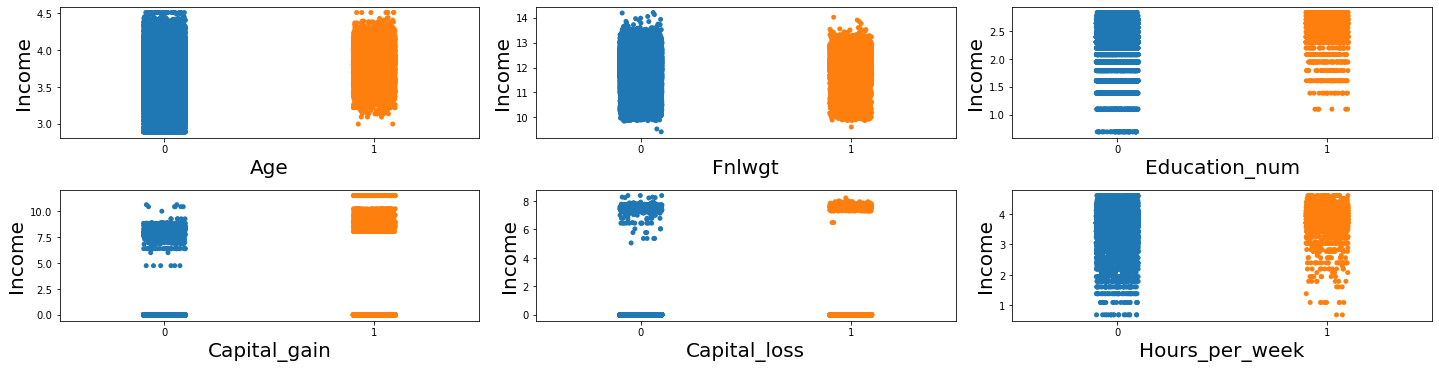

In [52]:
#ploting scatter plot 
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=30:
        ax=plt.subplot(10,3,plotnumber)
        sns.stripplot(y,df[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Income',fontsize=20)
    plotnumber+=1
plt.tight_layout() 

## Standardisation

In [53]:
#scaling age and fare columns of the continous data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
feature_scale=['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']
x[feature_scale]=scaler.fit_transform(x[feature_scale])
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,?,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,Germany,Greece,Guatemala,Haiti,Holand-Netherlands,Honduras,Hong,Hungary,India,Iran,Ireland,Italy,Jamaica,Japan,Laos,Mexico,Nicaragua,Outlying-US(Guam-USVI-etc),Peru,Philippines,Poland,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,0.895543,6,-1.036033,9,0.973511,2,4,0,4,1,-0.299216,-0.221078,-2.651860,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.129143,4,0.471834,11,-0.255333,0,6,1,4,1,-0.299216,-0.221078,0.124561,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1.058839,4,0.606218,1,-1.070284,2,6,0,2,1,-0.299216,-0.221078,0.124561,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,-0.717256,4,1.186274,9,0.973511,2,10,5,2,0,-0.299216,-0.221078,0.124561,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.054933,4,0.911617,12,1.225482,2,4,5,4,0,-0.299216,-0.221078,0.124561,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,-0.817508,4,0.751848,7,0.702858,2,13,5,4,0,-0.299216,-0.221078,-0.004660,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32556,0.272017,4,-0.058124,11,-0.255333,2,7,0,4,1,-0.299216,-0.221078,0.124561,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32557,1.311826,4,-0.083634,11,-0.255333,6,1,4,4,0,-0.299216,-0.221078,0.124561,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32558,-1.379488,4,0.364183,11,-0.255333,4,1,3,4,1,-0.299216,-0.221078,-1.604185,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


### SMOTE

In [54]:
#over sampling technique on minprity class using smote method
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x_over,y_over=sm.fit_resample(x,y)
y_over.value_counts()

0    24719
1    24719
Name: Income, dtype: int64

<AxesSubplot:xlabel='Income', ylabel='count'>

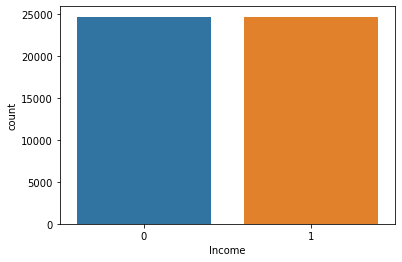

In [55]:
#count plot after upsampling
sns.countplot(y_over)

### Principle Component Analysis

In [56]:
#importing PCA
from sklearn.decomposition import PCA
pca=PCA()
pca.fit_transform(x_over)
var_cumu=np.cumsum(pca.explained_variance_ratio_)*100
var_cumu

array([ 40.09195273,  69.19181422,  76.47646006,  80.7629535 ,
        84.66583668,  88.25956006,  91.12796341,  93.22436065,
        94.97570198,  96.52521201,  98.02254874,  99.41450084,
        99.65387758,  99.84983358,  99.87811418,  99.89921693,
        99.90928691,  99.91555635,  99.92145338,  99.92693417,
        99.9320528 ,  99.93676701,  99.94112923,  99.94514351,
        99.94898464,  99.95273405,  99.95628358,  99.95964933,
        99.96282563,  99.96594373,  99.96889778,  99.97173069,
        99.97446537,  99.97704127,  99.97930874,  99.98130316,
        99.98316085,  99.98481242,  99.98633319,  99.98773229,
        99.98906502,  99.99036908,  99.99157005,  99.99263637,
        99.99354687,  99.99442019,  99.99527475,  99.99610222,
        99.99688341,  99.99760196,  99.99823755,  99.99883507,
        99.99941492,  99.99995407, 100.        ])

In [57]:
k=np.argmax(var_cumu>99)
k

11

### Scree Plot

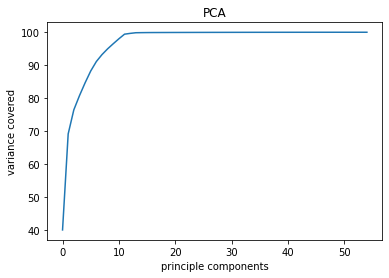

In [58]:
#checking from plot
plt.figure()
plt.plot(var_cumu)
plt.xlabel('principle components')
plt.ylabel('variance covered')
plt.title('PCA')
plt.show()

In [59]:
finalPCA=PCA(n_components=11)
final_data=finalPCA.fit_transform(x_over)
df_component=pd.DataFrame(final_data)
df_component

,0,1,2,3,4,5,6,7,8,9,10
0,-2.486136,1.412918,-1.384850,1.834150,-0.590398,-0.085916,-0.540087,1.223652,1.323237,2.813467,0.306717
1,-0.709140,-0.521648,-0.980111,0.256805,1.364138,-1.244721,-1.119535,-0.679380,0.332956,-0.125325,-0.501609
2,-0.500157,9.524168,-1.583450,-0.075428,-0.146254,-0.265057,-0.652985,-0.569160,0.374484,-0.312656,1.791765
3,3.161911,1.453028,3.602134,0.697285,1.711764,-0.775107,-0.032653,-1.186609,-1.173979,-0.039354,1.479188
4,-2.858025,-1.489105,3.044248,1.151810,1.718665,-0.784328,0.033449,-0.797554,-1.088237,0.740370,-0.093862
...,...,...,...,...,...,...,...,...,...,...,...
49433,5.431273,3.218168,-1.785101,-0.482251,1.593207,2.249826,1.138250,-0.308144,-0.231624,0.037992,-0.174306
49434,3.363403,1.289109,-1.187089,-0.344460,-0.115745,-0.278397,-0.512568,1.693682,-0.455591,0.631352,-0.059233
49435,5.321163,-0.631786,-1.098908,-0.548153,-1.100742,-2.684599,3.126607,-0.019081,0.757104,-0.954710,-0.720808
49436,-3.312932,8.489671,-2.305012,2.140727,-0.369449,-0.190602,-0.532944,0.159509,0.143814,0.416985,0.214976


In [60]:
#importing the train test split
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(df_component,y_over,test_size=0.25,random_state=500)

In [61]:
#Importing classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [62]:
#importing evaluation metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.model_selection import train_test_split

# Logistic Regression

In [63]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [64]:
#prediction
y_pred_lr=lr.predict(x_test)

In [65]:
#Training score
lr.score(x_train,y_train)

0.7543556826150278

In [66]:
#testing score
lr.score(x_test,y_test)

0.7538025889967638

In [67]:
#accuracy score
accuracy_score(y_test,y_pred_lr)

0.7538025889967638

In [68]:
#evaluation metrics 
np.mean(cross_val_score(lr,df_component,y_over,cv=5))

0.7538128035310334

In [69]:
#evaluation metrics
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.76      0.75      0.75      6193
           1       0.75      0.76      0.75      6167

    accuracy                           0.75     12360
   macro avg       0.75      0.75      0.75     12360
weighted avg       0.75      0.75      0.75     12360



In [70]:
confusion_matrix(y_test,y_pred_lr)

array([[4632, 1561],
       [1482, 4685]])

# KNeighbors Classifier

In [71]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [72]:
#prediction
y_pred_knn=knn.predict(x_test)

In [73]:
#testing score
knn.score(x_test,y_test)

0.8469255663430421

In [74]:
#accuracy score
accuracy_score(y_test,y_pred_knn)

0.8469255663430421

In [75]:
#cross validation score
np.mean(cross_val_score(knn,df_component,y_over,cv=5))

0.8499335983670493

In [76]:
#evaluation metrics
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.90      0.78      0.84      6193
           1       0.80      0.92      0.86      6167

    accuracy                           0.85     12360
   macro avg       0.85      0.85      0.85     12360
weighted avg       0.85      0.85      0.85     12360



In [77]:
confusion_matrix(y_test,y_pred_knn)

array([[4810, 1383],
       [ 509, 5658]])

# Decision Tree Classifier

In [78]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [79]:
#prediction
y_pred_dt=dt.predict(x_test)

In [80]:
#training score
dt.score(x_train,y_train)

1.0

In [81]:
#accuracy score
accuracy_score(y_test,y_pred_dt)

0.8285598705501618

In [82]:
#cross validation score
np.mean(cross_val_score(dt,df_component,y_over,cv=5))

0.8361791275392518

In [83]:
#evaluation metrics
dt.score(x_test,y_test)

0.8285598705501618

In [84]:
#classification report
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.84      0.81      0.83      6193
           1       0.82      0.84      0.83      6167

    accuracy                           0.83     12360
   macro avg       0.83      0.83      0.83     12360
weighted avg       0.83      0.83      0.83     12360



In [85]:
#printing confusion matrics
confusion_matrix(y_test,y_pred_dt)

array([[5041, 1152],
       [ 967, 5200]])

# Random Forest Classifier

In [86]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [87]:
#prediction
y_pred_rf=rf.predict(x_test)

In [88]:
#training score
rf.score(x_train,y_train)

0.9999730298290092

In [89]:
#accuracy score
accuracy_score(y_test,y_pred_rf)

0.8821197411003237

In [90]:
#cross validation score
np.mean(cross_val_score(rf,df_component,y_over,cv=5))

0.8826818309846246

In [91]:
#evaluation metrics
rf.score(x_test,y_test)

0.8821197411003237

In [92]:
#classification report
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88      6193
           1       0.86      0.91      0.89      6167

    accuracy                           0.88     12360
   macro avg       0.88      0.88      0.88     12360
weighted avg       0.88      0.88      0.88     12360



In [93]:
#confusion matrix
confusion_matrix(y_test,y_pred_rf)

array([[5288,  905],
       [ 552, 5615]])

# Support Vector Classifier

In [94]:
svm=SVC()
svm.fit(x_train,y_train)

SVC()

In [95]:
#prediction
y_pred_svm=svm.predict(x_test)

In [96]:
#trining score
svm.score(x_train,y_train)

0.8231026484707913

In [97]:
#accuracy score
accuracy_score(y_test,y_pred_svm)

0.8159385113268608

In [98]:
#corss validation score
np.mean(cross_val_score(svm,df_component,y_over,cv=5))

0.8185000579362329

In [99]:
#evaluation metrics
svm.score(x_test,y_test)

0.8159385113268608

In [100]:
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.86      0.76      0.80      6193
           1       0.78      0.87      0.83      6167

    accuracy                           0.82     12360
   macro avg       0.82      0.82      0.82     12360
weighted avg       0.82      0.82      0.82     12360



In [101]:
confusion_matrix(y_test,y_pred_svm)

array([[4694, 1499],
       [ 776, 5391]])

# AOC RUC Score

In [102]:
#logistic regression
roc_auc_score(y_test,y_pred_lr)

0.75381494472004

In [103]:
#KNN
roc_auc_score(y_test,y_pred_knn)

0.8470736365204744

In [104]:
#decision tree classifier
roc_auc_score(y_test,y_pred_dt)

0.828590597391391

In [105]:
#ranom forest
roc_auc_score(y_test,y_pred_rf)

0.8821792971455372

In [106]:
#support vector classifier
roc_auc_score(y_test,y_pred_svm)

0.816060745443229

# Final Model

#### Random Forest Classifier

Random Forest Classifier is the best accuracy score abd cross vaidation score 

# Hyper Parameter Tuning

In [108]:
#importing GridSearchCV
from sklearn.model_selection import GridSearchCV

In [109]:
param_grid = {
    'max_depth':[6,7,8],
    'max_features':['auto','sqrt'],
    'n_estimators':[200,300],
    'criterion' :['gini','entropy']
}

In [110]:
rf = RandomForestClassifier()

In [111]:
rf_cv = GridSearchCV(rf, param_grid, cv=5)

In [112]:
rf_cv.fit(x,y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 8],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [200, 300]})

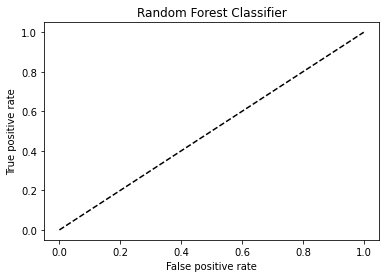

In [113]:
plt.plot([0,1],[0,1],'k--')
plt.plot(label='Random Forest Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest Classifier')
plt.show()

## Evaluate The Final Model

In [114]:
Final_mod = RandomForestClassifier()
Final_mod.fit(x_train,y_train)
pred = Final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

88.33333333333333


## Saving The Model

In [115]:
import joblib
joblib.dump(Final_mod,'FinalModel.csv')

['FinalModel.csv']

* Final model has been saved.

### Prediction Method

In [116]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
preds = rf.predict(x_test)
print(preds[:36])
print(y_test[:36].values)

[1 1 1 0 1 1 1 0 1 0 0 1 1 0 1 0 1 1 0 1 1 0 1 1 1 0 1 0 0 0 1 1 0 1 0 0]
[1 1 1 0 1 1 1 0 1 0 0 1 1 0 1 0 0 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0]


* The train and test data is balanced most classification methods hit the 88% accuracy with the dataset.